In [17]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import welch
from scipy.ndimage import gaussian_filter1d


In [ ]:
def load_wav(path):
    audio, sr = sf.read(path)
    return audio.astype(np.float32), sr

def psd_smooth(audio, fs, nperseg=2**14, sigma=2):
    f, Pxx = welch(audio, fs=fs, nperseg=nperseg)
    Pxx_db = 10 * np.log10(Pxx + 1e-10)  # Add small value to avoid log(0)
    return f, gaussian_filter1d(Pxx_db, sigma=sigma)

octave_edges = [20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240, 20000]

def octave_bands(f, psd_db):
    bands = []
    for i in range(len(octave_edges)-1):
        idx = (f >= octave_edges[i]) & (f < octave_edges[i+1])
        if np.any(idx):
            bands.append(np.mean(psd_db[idx]))
        else:
            bands.append(-100)  # Very low value if no data in band
    return np.array(bands)


Loaded 720000 samples at 48000 Hz
Shape: (720000,), Duration: 15.00s


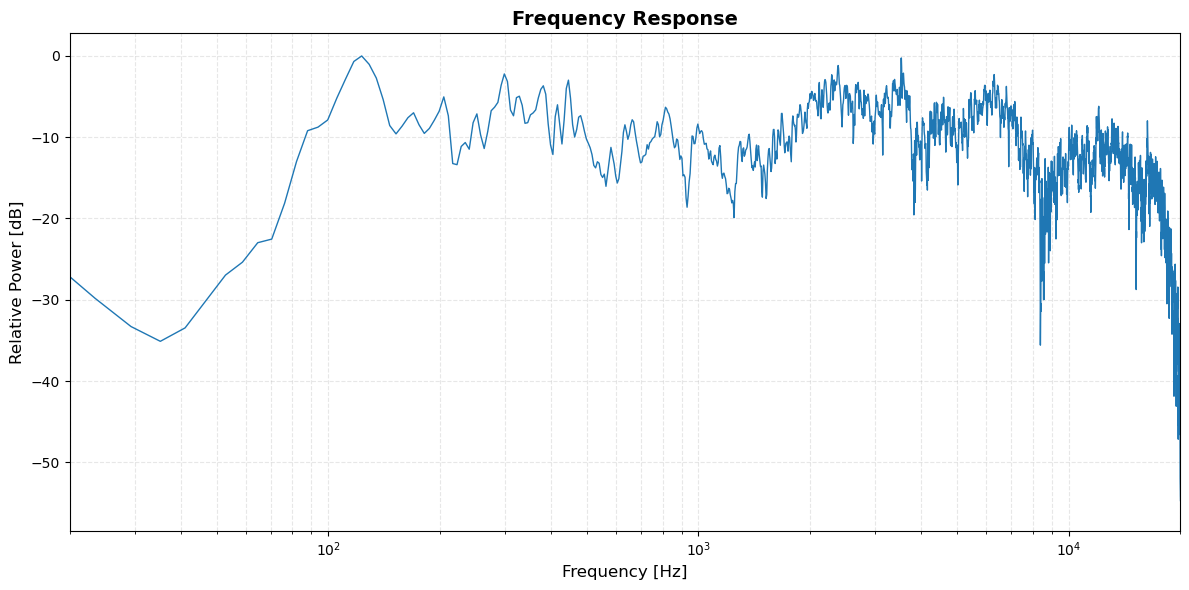

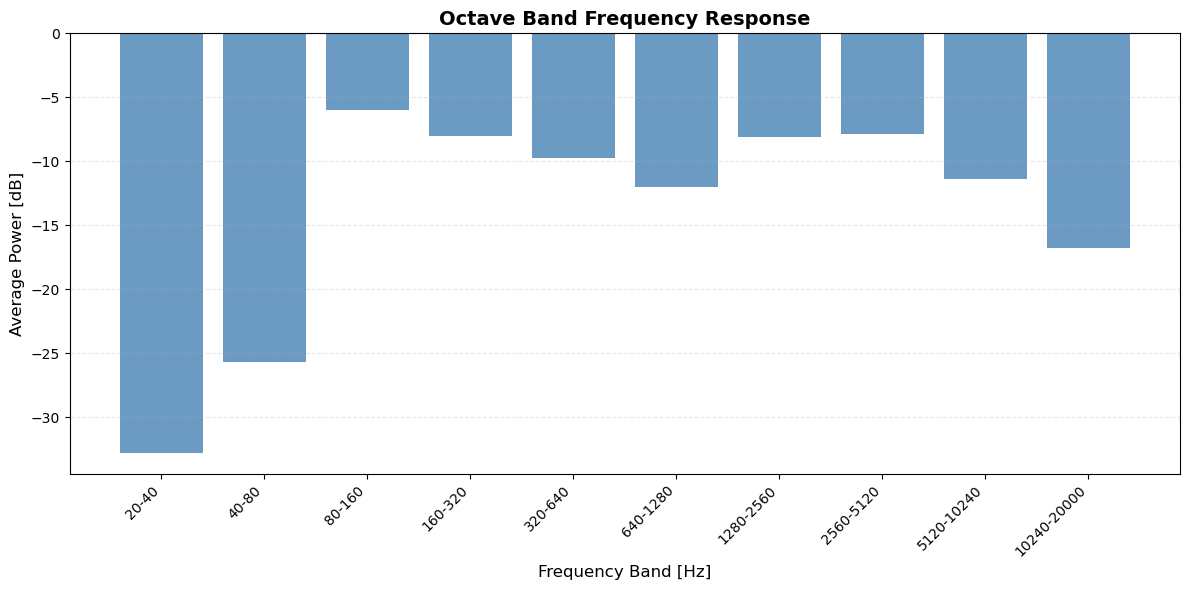


Octave Band Analysis:
Band    20-   40 Hz: -32.75 dB
Band    40-   80 Hz: -25.64 dB
Band    80-  160 Hz:  -5.96 dB
Band   160-  320 Hz:  -8.00 dB
Band   320-  640 Hz:  -9.73 dB
Band   640- 1280 Hz: -12.02 dB
Band  1280- 2560 Hz:  -8.07 dB
Band  2560- 5120 Hz:  -7.85 dB
Band  5120-10240 Hz: -11.37 dB
Band 10240-20000 Hz: -16.75 dB


In [ ]:
# Load the frequency sweep recording
wav_filename = "data/recorded_freq_sweep.wav"
audio, sample_rate = load_wav(wav_filename)

print(f"Loaded {len(audio)} samples at {sample_rate} Hz")
print(f"Shape: {audio. shape}, Duration: {len(audio)/sample_rate:.2f}s")

# Compute PSD using Welch's method
frequencies, psd = welch(audio, fs=sample_rate, nperseg=8192)

# Convert to dB
psd_db = 10 * np.log10(psd + 1e-12)  # Add small value to avoid log(0)

# Normalize PSD (relative to maximum)
psd_db_norm = psd_db - np. max(psd_db)

# PLOT 1: Frequency Response
plt.figure(figsize=(12, 6))
plt.semilogx(frequencies, psd_db_norm, linewidth=1)
plt.title("Frequency Response", fontsize=14, fontweight='bold')
plt.xlabel("Frequency [Hz]", fontsize=12)
plt.ylabel("Relative Power [dB]", fontsize=12)
plt.grid(True, which="both", ls="--", alpha=0.3)
plt. xlim([20, 20000])
plt.tight_layout()
plt.show()

# PLOT 2: Octave Band Analysis
band_power = octave_bands(frequencies, psd_db_norm)

plt.figure(figsize=(12, 6))
plt.bar(range(len(band_power)), band_power, alpha=0.8, color='steelblue')
plt.xticks(range(len(band_power)), 
           [f"{octave_edges[i]}-{octave_edges[i+1]}" for i in range(len(octave_edges)-1)], 
           rotation=45, ha='right')
plt.xlabel("Frequency Band [Hz]", fontsize=12)
plt.ylabel("Average Power [dB]", fontsize=12)
plt. title("Octave Band Frequency Response", fontsize=14, fontweight='bold')
plt.grid(True, axis="y", ls="--", alpha=0.3)
plt.tight_layout()
plt.show()


# Print band values
print("\n" + "="*50)
print("Octave Band Analysis:")
print("="*50)
for i, val in enumerate(band_power):
    print(f"Band {octave_edges[i]:5d}-{octave_edges[i+1]:5d} Hz: {val:6.2f} dB")
print("="*50)